In [ ]:
#@title Presentación
from IPython.display import display, HTML

# HTML para la portada
html_code = """
<div style="
    background-color: #f4f4f4;
    border-radius: 15px;
    padding: 30px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #333;
    box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #4CAF50; font-size: 50px;">Microproyecto 3 - FIFA_21 Players</h1>
    <h2 style="color: #555;">Equipo 9</h2>
    <hr style="border: none; height: 2px; background-color: #4CAF50; margin: 20px auto; width: 50%;">
    <h3 style="color: #222; margin: 10px 0;">Estudiantes:</h3>
    <ul style="list-style: none; padding: 0; font-size: 20px;">
        <li>Luis Alejandro Varela Ojeda</li>
        <li>Juan Manuel Rodríguez Sánchez</li>
        <li>Jacobo Ochoa Ramírez</li>
    </ul>
</div>
"""

# Mostrar la portada
display(HTML(html_code))


# Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías Árboles de Decisión
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import GridSearchCV

# librerías Gaussian Naive Bayes
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer


def load_data(input_file):
  return pd.read_csv(input_file)


#Cargar los datos

In [ ]:
players_df  = load_data('players_21.csv')
players_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,75,96,NaN,35,24,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,84,95,NaN,32,24,7,11,15,14,11
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,11,68,NaN,12,18,87,92,78,90,90
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,88,88,NaN,42,19,15,6,12,8,10
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,92,93,NaN,30,29,9,9,15,15,11


#Análisis exploratorio de los datos

##Exploración de los datos

In [ ]:
print(players_df.shape)
players_df.info()

(18944, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   player_url                  18944 non-null  object 
 2   short_name                  18944 non-null  object 
 3   long_name                   18944 non-null  object 
 4   age                         18944 non-null  int64  
 5   dob                         18944 non-null  object 
 6   height_cm                   18944 non-null  int64  
 7   weight_kg                   18944 non-null  int64  
 8   nationality                 18944 non-null  object 
 9   club_name                   18719 non-null  object 
 10  league_name                 18719 non-null  object 
 11  league_rank                 18719 non-null  float64
 12  overall                     18944 non-null  int64  
 13  potential          

In [ ]:
# Cantidad de nulos en columnas con nulos
values = list(map(lambda x: x!=0,players_df.isnull().sum()))
cont = 0
for i in range(len(players_df.columns)):
  if values[i]:
    print(players_df.columns[i], players_df[players_df.columns[i]].isnull().sum())

club_name 225
league_name 225
league_rank 225
release_clause_eur 995
player_tags 17536
team_position 225
team_jersey_number 225
loaned_from 18186
joined 983
contract_valid_until 225
nation_position 17817
nation_jersey_number 17817
pace 2083
shooting 2083
passing 2083
dribbling 2083
defending 2083
physic 2083
gk_diving 16861
gk_handling 16861
gk_kicking 16861
gk_reflexes 16861
gk_speed 16861
gk_positioning 16861
player_traits 10629
defending_marking 18944


##Limpieza de los datos

In [ ]:
#Descartar columnas
discard_columns = [
    "body_type",
    "real_face",
    "loaned_from",
    "player_traits",
    "nation_position",
    "player_positions",
    "player_tags",
    "sofifa_id",
    "player_url",
    "short_name",
    "long_name",
    "value_eur",
    "wage_eur",
    "release_clause_eur",
    "dob",
    "nationality",
    "club_name",
    "league_name",
    "joined",
    "contract_valid_until",
    "nation_jersey_number",
    "defending_marking",
    "international_reputation",
    "goalkeeping_diving",
    "goalkeeping_handling",
    "goalkeeping_kicking",
    "goalkeeping_positioning",
    "goalkeeping_reflexes"
]

players_df = players_df.drop(columns=discard_columns)

### Eliminación de columnas

Se descartan el conjunto de variables por los siguientes motivos:
 - Las columnas tienen una gran cantidad de valores nulos.
 - La columna no aporta información importante para la predicción de la variable objetivo (esta decisión es tomada con base en el conocimiento previo del deporte del equipo de trabajo)

**Caso especial**: las variables que hacen referencia a las habilidades del portero ya se encuentran representadas en otras seis columnas con datos muy similares. Por este motivo se van a descartar.


La columna work_rate hace referencia a la cantidad de esfuerzo que un jugador realiza en defensa (primer valor) y en ataque (segundo valor). Para que ambas características sean utilizadas individualmente se dividió la columna en dos.

In [ ]:
#Dividir columna 'work_rate'
mapping = {'High': 3, 'Medium': 2, 'Low': 1}

#Dividir 'work_rate' en dos nuevas columnas 'defense_work_rate' y 'offense_work_rate'
players_df[['defense_work_rate', 'offense_work_rate']] = players_df['work_rate'].str.split('/', expand=True)

#Se asignan los valores correspondientes a cada una de las categorías de ambas columnas
players_df['defense_work_rate'] = players_df['defense_work_rate'].map(mapping)
players_df['offense_work_rate'] = players_df['offense_work_rate'].map(mapping)

players_df = players_df.drop("work_rate", axis=1)

Para este conjunto de variables se reemplazaron los valores nulos por 0s. Estas columnas presentan la particularidad de que cuando un jugador es portero, pace, shooting, passing, dribbling, defending y physic, tienen valores nulos, mientras que para gk_diving, gk_handling,	gk_kicking,	gk_reflexes, gk_speed y gk_positioning, toman valores no nulos, y viceversa.



In [ ]:
#Reemplazar nulos por 0s
replace_nulls= [
  "pace",
  "shooting",
  "passing",
  "dribbling",
  "defending",
  "physic",
  "gk_diving",
  "gk_handling",
  "gk_kicking",
  "gk_reflexes",
  "gk_speed",
  "gk_positioning"
]

players_df[replace_nulls] = players_df[replace_nulls].fillna(0)

players_df[replace_nulls].head()

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
1,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0
3,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0
4,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0


Las variables gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning toman valores no nulos para aquellos datos que corresponden a porteros, por ende, para simplificar el modelo, se creará una única columna 'is_gk_mean' que identifique a esta posición, con el valor promedio de las columnas susodichas.

In [ ]:
gk_cols = ["gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"]

# Crear la nueva columna "is_gk_mean", calculando el promedio de las variables de gk_cols, para aquellas filas que tengan
# valores en estas columnas (es goalkeeper o portero) y 0 para el resto.

players_df["is_gk_mean"] = players_df[gk_cols].mean(axis=1)

# Eliminar las columnas de portero
players_df.drop(columns=gk_cols, inplace=True)

# Ahora players_df solo tendrá la columna "is_gk" (además de las que ya tuviera antes).
players_df.head()

,age,height_cm,weight_kg,league_rank,overall,potential,preferred_foot,weak_foot,skill_moves,team_position,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,defense_work_rate,offense_work_rate,is_gk_mean
0,33,170,72,1.0,93,93,Left,4,4,CAM,...,40,93,95,75,96,35,24,2,1,0.0
1,35,187,83,1.0,92,92,Right,4,5,LS,...,29,95,82,84,95,32,24,3,1,0.0
2,27,188,87,1.0,91,93,Right,3,1,GK,...,19,11,65,11,68,12,18,2,2,81.5
3,31,184,80,1.0,91,91,Right,4,4,ST,...,49,94,79,88,88,42,19,3,2,0.0
4,28,175,68,1.0,91,91,Right,5,5,LW,...,36,87,90,92,93,30,29,3,2,0.0


In [ ]:
#Eliminar datos en nulos de la variable predictora
players_df = players_df.dropna(subset=["team_position"])
players_df.head()

,age,height_cm,weight_kg,league_rank,overall,potential,preferred_foot,weak_foot,skill_moves,team_position,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,defense_work_rate,offense_work_rate,is_gk_mean
0,33,170,72,1.0,93,93,Left,4,4,CAM,...,40,93,95,75,96,35,24,2,1,0.0
1,35,187,83,1.0,92,92,Right,4,5,LS,...,29,95,82,84,95,32,24,3,1,0.0
2,27,188,87,1.0,91,93,Right,3,1,GK,...,19,11,65,11,68,12,18,2,2,81.5
3,31,184,80,1.0,91,91,Right,4,4,ST,...,49,94,79,88,88,42,19,3,2,0.0
4,28,175,68,1.0,91,91,Right,5,5,LW,...,36,87,90,92,93,30,29,3,2,0.0


##Distribución de la variable a predecir

In [ ]:
#Variable a predecir
players_df.groupby("team_position").size()

,0
team_position,
CAM,286
CB,128
CDM,181
CF,13
CM,76
GK,681
LAM,25
LB,553
LCB,681


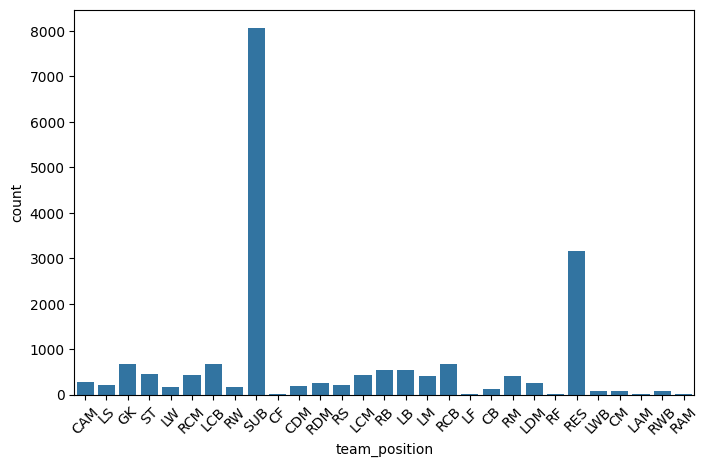

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="team_position", data=players_df)

# Rotate labels
plt.xticks(rotation=45)

# Show plot
plt.show()

## Eliminación de las categorías SUB y RES

En el gráfico es muy evidente que el conjunto de datos está compuesto en su gran mayoría por jugadores suplentes (SUB) O de reserva (RES). Esto es problemático ya que estos jugadores pueden tener las características de cualquiera de las otras posiciones y hay una gran cantidad de estos. Dado el contexto del deporte y la manera en la que están distribuidos los datos, se toma la decisión de descartar todos los datos de estas dos categorías para poder obtener un modelo más preciso.

In [ ]:
discard_rows = ['SUB', 'RES']

players_df_reduce = players_df.copy()
players_df_reduce = players_df_reduce[~players_df_reduce["team_position"].isin(discard_rows)]

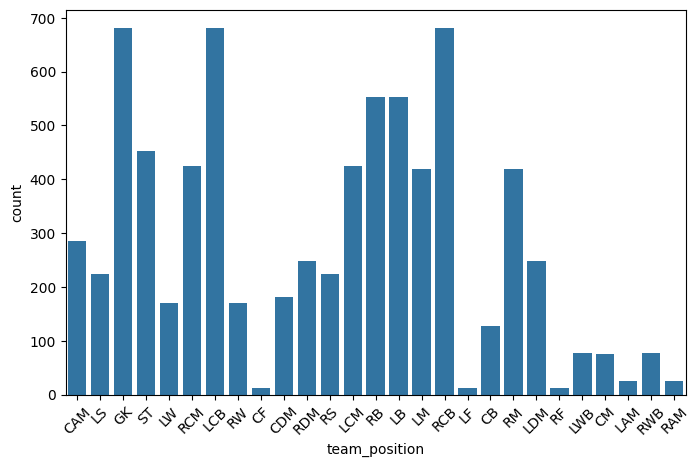

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="team_position", data=players_df_reduce)

# Rotate labels
plt.xticks(rotation=45)

# Show plot
plt.show()

##Agrupar categorías de la variable objetivo position

Para que el árbol de decisión tenga un comportamiento más óptimo se van a agrupar las posiciones restantes en cuatro grupos (con base en los colores de la siguiente imagen, extraída de la página web con la cual se construyó el dataset):
 - Attacking (Atacantes): azul
 - Midfielder (Mediocampistas): verde
 - Defender (Defensas): naranjado
 - Goalkeeper (Porteros/Arqueros): rojo

 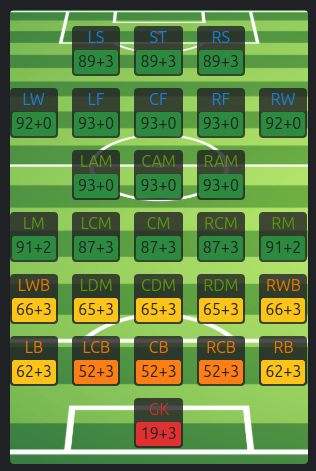



In [ ]:
# Diccionario de posiciones agrupadas

position_groups = {
    "Attacking": ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW"],
    "Midfielder": ["LM", "LCM", "CM", "RCM", "RM", "LDM", "CDM", "RDM",  "LAM", "CAM", "RAM"],
    "Defender": ["LWB", "RWB", "LB", "LCB", "CB", "RCB", "RB"],
    "Goalkeeper": ["GK"]
}

# Invertir el diccionario para mapear más fácilmente
position_map = {pos: position for position, positions in position_groups.items() for pos in positions}

players_df_reduce["position"] = players_df_reduce["team_position"].map(position_map)

# Mostrar el DataFrame con la nueva columna
players_df_reduce.head()


,age,height_cm,weight_kg,league_rank,overall,potential,preferred_foot,weak_foot,skill_moves,team_position,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,defense_work_rate,offense_work_rate,is_gk_mean,position
0,33,170,72,1.0,93,93,Left,4,4,CAM,...,93,95,75,96,35,24,2,1,0.0,Midfielder
1,35,187,83,1.0,92,92,Right,4,5,LS,...,95,82,84,95,32,24,3,1,0.0,Attacking
2,27,188,87,1.0,91,93,Right,3,1,GK,...,11,65,11,68,12,18,2,2,81.5,Goalkeeper
3,31,184,80,1.0,91,91,Right,4,4,ST,...,94,79,88,88,42,19,3,2,0.0,Attacking
4,28,175,68,1.0,91,91,Right,5,5,LW,...,87,90,92,93,30,29,3,2,0.0,Attacking


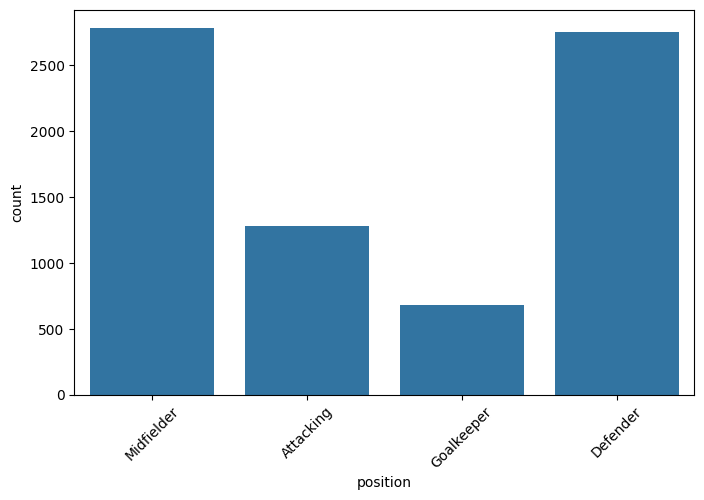

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="position", data=players_df_reduce)

# Rotate labels
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
label_encoding = preprocessing.LabelEncoder()
encoded_players_df = players_df_reduce.copy()

In [ ]:
#Convertir varibales categoricas a numéricas
categorical_columns = ["preferred_foot","team_position","position"] #"category_position"

def encode_categorical_columns(df, categorical_columns):
  # Initialize the LabelEncoder
  label_encoder = preprocessing.LabelEncoder()

  # Iterate over the categorical columns
  for column in categorical_columns:
    # Apply label encoding to the specified column
    df[column] = label_encoder.fit_transform(df[column].astype(str))

  return df

In [ ]:
encoded_players_df = encode_categorical_columns(encoded_players_df, categorical_columns)
encoded_players_df = encoded_players_df.drop(['team_position'], axis=1)
encoded_players_df.head()

,age,height_cm,weight_kg,league_rank,overall,potential,preferred_foot,weak_foot,skill_moves,team_jersey_number,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,defense_work_rate,offense_work_rate,is_gk_mean,position
0,33,170,72,1.0,93,93,0,4,4,10.0,...,93,95,75,96,35,24,2,1,0.0,3
1,35,187,83,1.0,92,92,1,4,5,7.0,...,95,82,84,95,32,24,3,1,0.0,0
2,27,188,87,1.0,91,93,1,3,1,13.0,...,11,65,11,68,12,18,2,2,81.5,2
3,31,184,80,1.0,91,91,1,4,4,9.0,...,94,79,88,88,42,19,3,2,0.0,0
4,28,175,68,1.0,91,91,1,5,5,10.0,...,87,90,92,93,30,29,3,2,0.0,0


#Árbol de Decisión (DT)

##Elección de variables

###Gráfico de correlación de Pearson

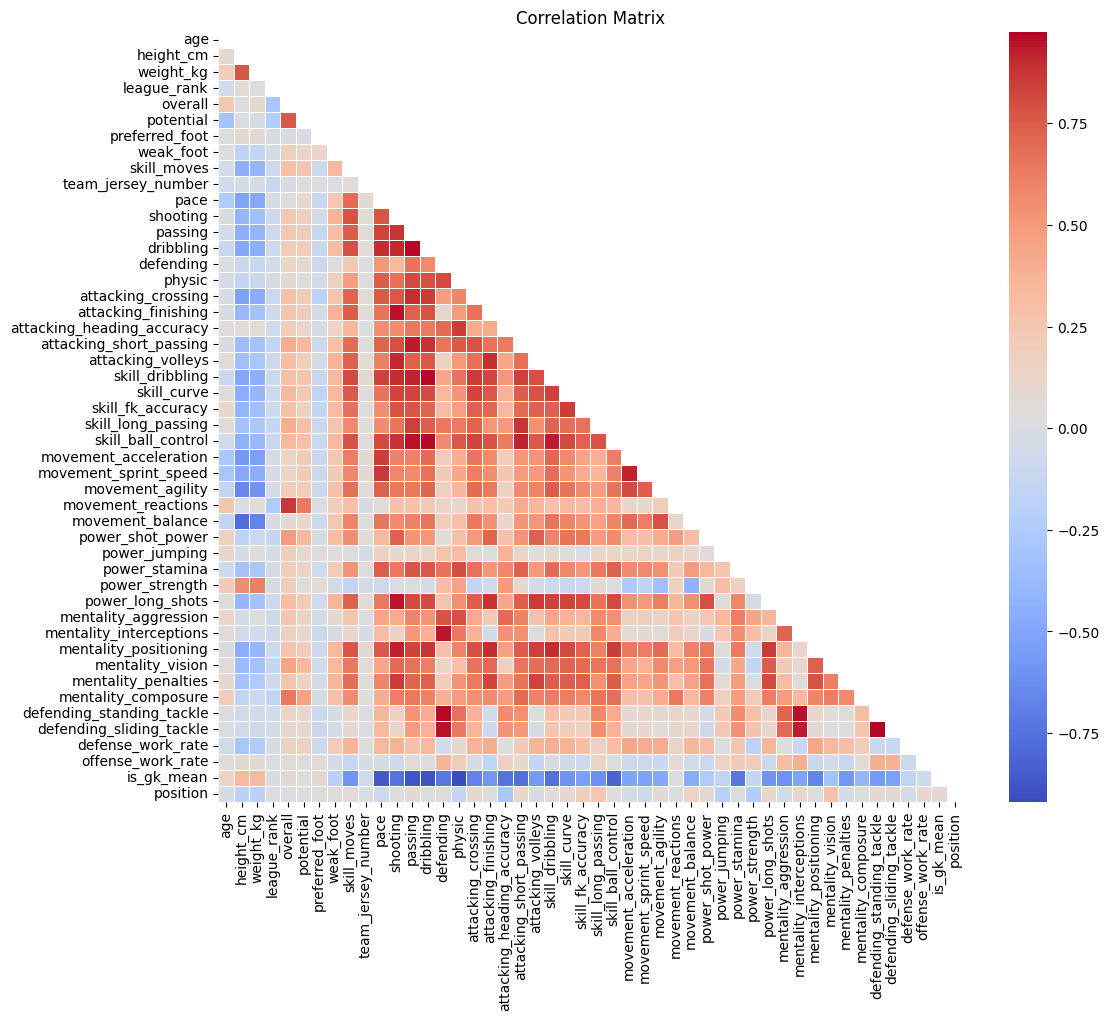

In [ ]:
df_selection = encoded_players_df.copy()
corr_matrix = df_selection.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Eliminación de variables basados en la matriz de correlación

Se determinó que las siguientes variables pueden descartarse, ya que presentan una alta correlación con otras variables y, por lo tanto, no aportan información adicional al modelo en construcción.

In [ ]:
discard_by_redundancy = [
  "defending_standing_tackle",
  "defending_sliding_tackle",
  "mentality_interceptions",
  "skill_ball_control",
  "skill_dribbling",
  "attacking_finishing",
  "attacking_short_passing",
  "power_long_shots",
  "movement_acceleration",
  "movement_reactions",
  "mentality_positioning",
  "mentality_penalties",
  "attacking_volleys",
  "skill_curve",
  "dribbling",
  "is_gk_mean",
  "skill_moves"
]

df_selection = df_selection.drop(columns=discard_by_redundancy)

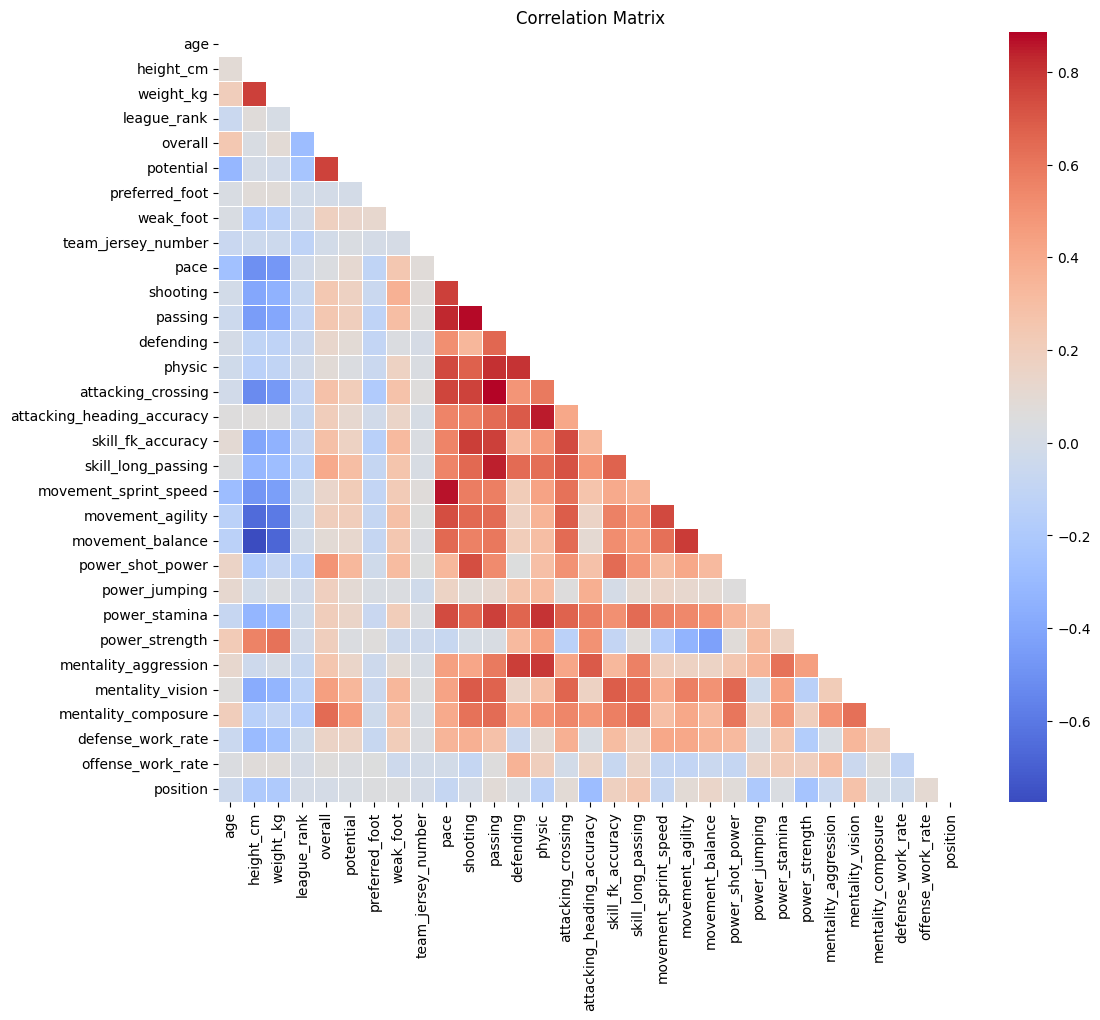

In [ ]:
corr_matrix = df_selection.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##Gini vs. Entropía

In [ ]:
#Característica objetivo: position

#Mezclar datos
df_selection = df_selection.sample(frac=1, random_state=1).reset_index(drop=True)

#Todos los datos excepto la caracteristica position

X = df_selection.drop(['position'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df_selection['position']

X = np.array(X)
y = np.array(y)

####Gini

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
accuracies = list()
max_attributes = len(list(df_selection))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced',
                                             random_state=1)
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df_g = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df_g = df_g[["Max Depth", "Average Accuracy"]]
print(df_g.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.461888
         2          0.612870
         3          0.775199
         4          0.753570
         5          0.756774
         6          0.790011
         7          0.801894
         8          0.803764
         9          0.810706
        10          0.806433
        11          0.802162
        12          0.802163
        13          0.802296
        14          0.802563
        15          0.803364
        16          0.801095
        17          0.802029
        18          0.801896
        19          0.801362
        20          0.801362
        21          0.801362
        22          0.801362
        23          0.801362
        24          0.801362
        25          0.801362
        26          0.801362
        27          0.801362
        28          0.801362
        29          0.801362
        30          0.801362
        31          0.801362


In [ ]:
#Resultado ordenando de mayor a menor según Average Accuracy
df_g_sort = df_g.sort_values("Average Accuracy", ascending=False)
df_g_sort.head()

,Max Depth,Average Accuracy
8,9,0.810706
9,10,0.806433
7,8,0.803764
14,15,0.803364
13,14,0.802563


####Entropía

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
accuracies = list()
max_attributes = len(list(df_selection))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced',
                                             random_state=1)
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df_e = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df_e = df_e[["Max Depth", "Average Accuracy"]]
print(df_e.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.461888
         2          0.612603
         3          0.731680
         4          0.749967
         5          0.758909
         6          0.778267
         7          0.795885
         8          0.800694
         9          0.800558
        10          0.800826
        11          0.801894
        12          0.801229
        13          0.801496
        14          0.799225
        15          0.798425
        16          0.799359
        17          0.798959
        18          0.798958
        19          0.800026
        20          0.800026
        21          0.800026
        22          0.800026
        23          0.800026
        24          0.800026
        25          0.800026
        26          0.800026
        27          0.800026
        28          0.800026
        29          0.800026
        30          0.800026
        31          0.800026


In [ ]:
#Resultado ordenando de mayor a menor según Average Accuracy
df_e_sort = df_e.sort_values("Average Accuracy", ascending=False)
df_e_sort.head()

,Max Depth,Average Accuracy
10,11,0.801894
12,13,0.801496
11,12,0.801229
9,10,0.800826
7,8,0.800694


Tenemos que el mejor criterio fue Gini, resultando una profunidad máxima de 9 con un promedio de exactitud del 0.810706, siendo esta más alta que la de Entropía que tenía una profundidad máxima de 11.

##Proporción datos entrenamiento vs. datos prueba

### 80 / 20

In [ ]:
#Todos los datos excepto la caracteristica comprar
X = df_selection.drop(['position'], axis=1)

#Atributo OBJETIVO
y = df_selection['position']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,1023
1,2201
2,545
3,2223


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced',
                                             random_state=1)

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.90
Exactitud con datos de pruebas: 0.81


### 75 / 25

In [ ]:
#Todos los datos excepto la caracteristica comprar
X = df_selection.drop(['position'], axis=1)

#Atributo OBJETIVO
y = df_selection['position']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, #75% datos de entrenamiento, 25% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,959
1,2064
2,511
3,2084


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced',
                                            random_state=1)

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.90
Exactitud con datos de pruebas: 0.80


### 70 / 30

In [ ]:
#Todos los datos excepto la caracteristica comprar
X = df_selection.drop(['position'], axis=1)

#Atributo OBJETIVO
y = df_selection['position']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #70% datos de entrenamiento, 30% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,895
1,1926
2,477
3,1945


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced',
                                             random_state=1)

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.90
Exactitud con datos de pruebas: 0.81


Al final se seleccionó la propoprción de datos como 80 % de entrenamiento y 20 % de prueba, al obtener la mayor exactitud en ambos casos junto con 70 % y 30 %, pero esta partición tiene suficiente información para aprender patrones relevantes sin sobreajustarse.

##SelectKBest

In [ ]:
X = df_selection.drop(['position'], axis=1)
y = df_selection['position']
lista_variables = [0] * 13

# Iterar sobre valores de k desde 3 hasta 12
for k in range(3, 13):  # 13 porque range() excluye el último número
  print(f"\nEvaluando con k = {k} atributos seleccionados:")

  # Selección de características con SelectKBest
  best = SelectKBest(k=k)
  X_new = best.fit_transform(X, y)

  # Obtener los nombres de las columnas seleccionadas
  selected = best.get_support(indices=True)
  selected_features = X.columns[selected]

  # Crear nuevo conjunto de datos con las características seleccionadas
  X_selected = df_selection[selected_features]

  # Dividir en conjunto de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                      test_size=0.2,
                                                      stratify=y,
                                                      random_state=1)

  # Crear y entrenar el modelo de árbol de decisión
  decision_tree = DecisionTreeClassifier(criterion='gini',
                                          min_samples_split=20,
                                          min_samples_leaf=5,
                                          max_depth=k,  # Se usa k como max_depth
                                          class_weight='balanced',
                                          random_state=1)

  decision_tree.fit(X_train, y_train)

  # Evaluación en entrenamiento
  y_pred_train = decision_tree.predict(X_train)
  acc_train = accuracy_score(y_train, y_pred_train)

  # Evaluación en prueba
  y_pred_test = decision_tree.predict(X_test)
  acc_test = accuracy_score(y_test, y_pred_test)

  # Imprimir resultados
  lista_variables[k] = selected_features
  print(selected_features)
  print(f"  - Exactitud en entrenamiento: {acc_train:.2f}")
  print(f"  - Exactitud en prueba: {acc_test:.2f}")


Evaluando con k = 3 atributos seleccionados:
Index(['shooting', 'passing', 'physic'], dtype='object')
  - Exactitud en entrenamiento: 0.72
  - Exactitud en prueba: 0.72

Evaluando con k = 4 atributos seleccionados:
Index(['shooting', 'passing', 'defending', 'physic'], dtype='object')
  - Exactitud en entrenamiento: 0.74
  - Exactitud en prueba: 0.73

Evaluando con k = 5 atributos seleccionados:
Index(['pace', 'shooting', 'passing', 'defending', 'physic'], dtype='object')
  - Exactitud en entrenamiento: 0.74
  - Exactitud en prueba: 0.74

Evaluando con k = 6 atributos seleccionados:
Index(['pace', 'shooting', 'passing', 'defending', 'physic',
       'attacking_heading_accuracy'],
      dtype='object')
  - Exactitud en entrenamiento: 0.80
  - Exactitud en prueba: 0.78

Evaluando con k = 7 atributos seleccionados:
Index(['pace', 'shooting', 'passing', 'defending', 'physic',
       'attacking_heading_accuracy', 'power_stamina'],
      dtype='object')
  - Exactitud en entrenamiento: 0.80
 

Según SelectKBest, la cantidad k de variables con mayor exactitud en entrenamiento y prueba (0.86 y 0.82, respecticamente), y muy poca diferencia entre estas, es k=9, con los siguientes variables seleccionadas:
- 'pace'
- 'shooting'
- 'passing'
- 'defending'
- 'physic'
- 'attacking_crossing'
- 'attacking_heading_accuracy'
- 'skill_long_passing'
- 'power_stamina'

In [ ]:
#Análisis para saber los mejores parámetros posibles para el árbol de decisión y su respectiva exactitud

grid = {
    'criterion': ['gini'],
    'max_depth': range(4, 10 + 1),
    'min_samples_split': range(5, 25 + 1),
    'min_samples_leaf': range(5, 20 + 1),
}

all_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight='balanced', random_state=1),
    param_grid=grid)

all_model.fit(X_train, y_train)

display(
    'Mejores parámetros',
    all_model.best_params_,
    '',
    'Mejor exactitud',
    all_model.best_score_
)

'Mejores parámetros'

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 11,
 'min_samples_split': 25}

''

'Mejor exactitud'

0.8077451855399811

In [ ]:
#Función para diferenciar las variables que no harán parte del modelo
def diferencias_lista(lista1, lista2):
  return list(set(lista1).symmetric_difference(set(lista2)))

In [ ]:
#Variables para usar en la clasificación
lista1 = lista_variables[9]
lista2 = X.columns

diferencias = diferencias_lista(lista1, lista2)
df_def = df_selection.drop(diferencias, axis=1)
print(df_def.columns)

Index(['pace', 'shooting', 'passing', 'defending', 'physic',
       'attacking_crossing', 'attacking_heading_accuracy',
       'skill_long_passing', 'power_stamina', 'position'],
      dtype='object')


In [ ]:
X = df_def.drop(['position'], axis=1)
y = df_def['position']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)

# Instanciar Arbol de decision con profundidad = 7
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            #Restricciones que evitan Overfitting.
                                            min_samples_split = 25, #5. Qué pasa si varió el número de muestras mínimo por nodo.
                                            min_samples_leaf = 11,   #5. Qué pasa si vario el número de muestras mínimo por hoja (Las hojas es el nodo final del).
                                            max_depth = 8,    #4. Testear qué pasa si aumento o disminuyo la altura del arbol.
                                                              #Tener en cuenta que la altura va desde 1 hasta el número de atributos (Variables).
                                            class_weight='balanced',
                                            random_state=1)  #Balanceo automático

                                            # Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)

#Datos de entrenamiento
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

#Datos de prueba
y_pred_test = decision_tree.predict(X_test)

#Porcentaje de exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.84
Exactitud con datos de pruebas: 0.82


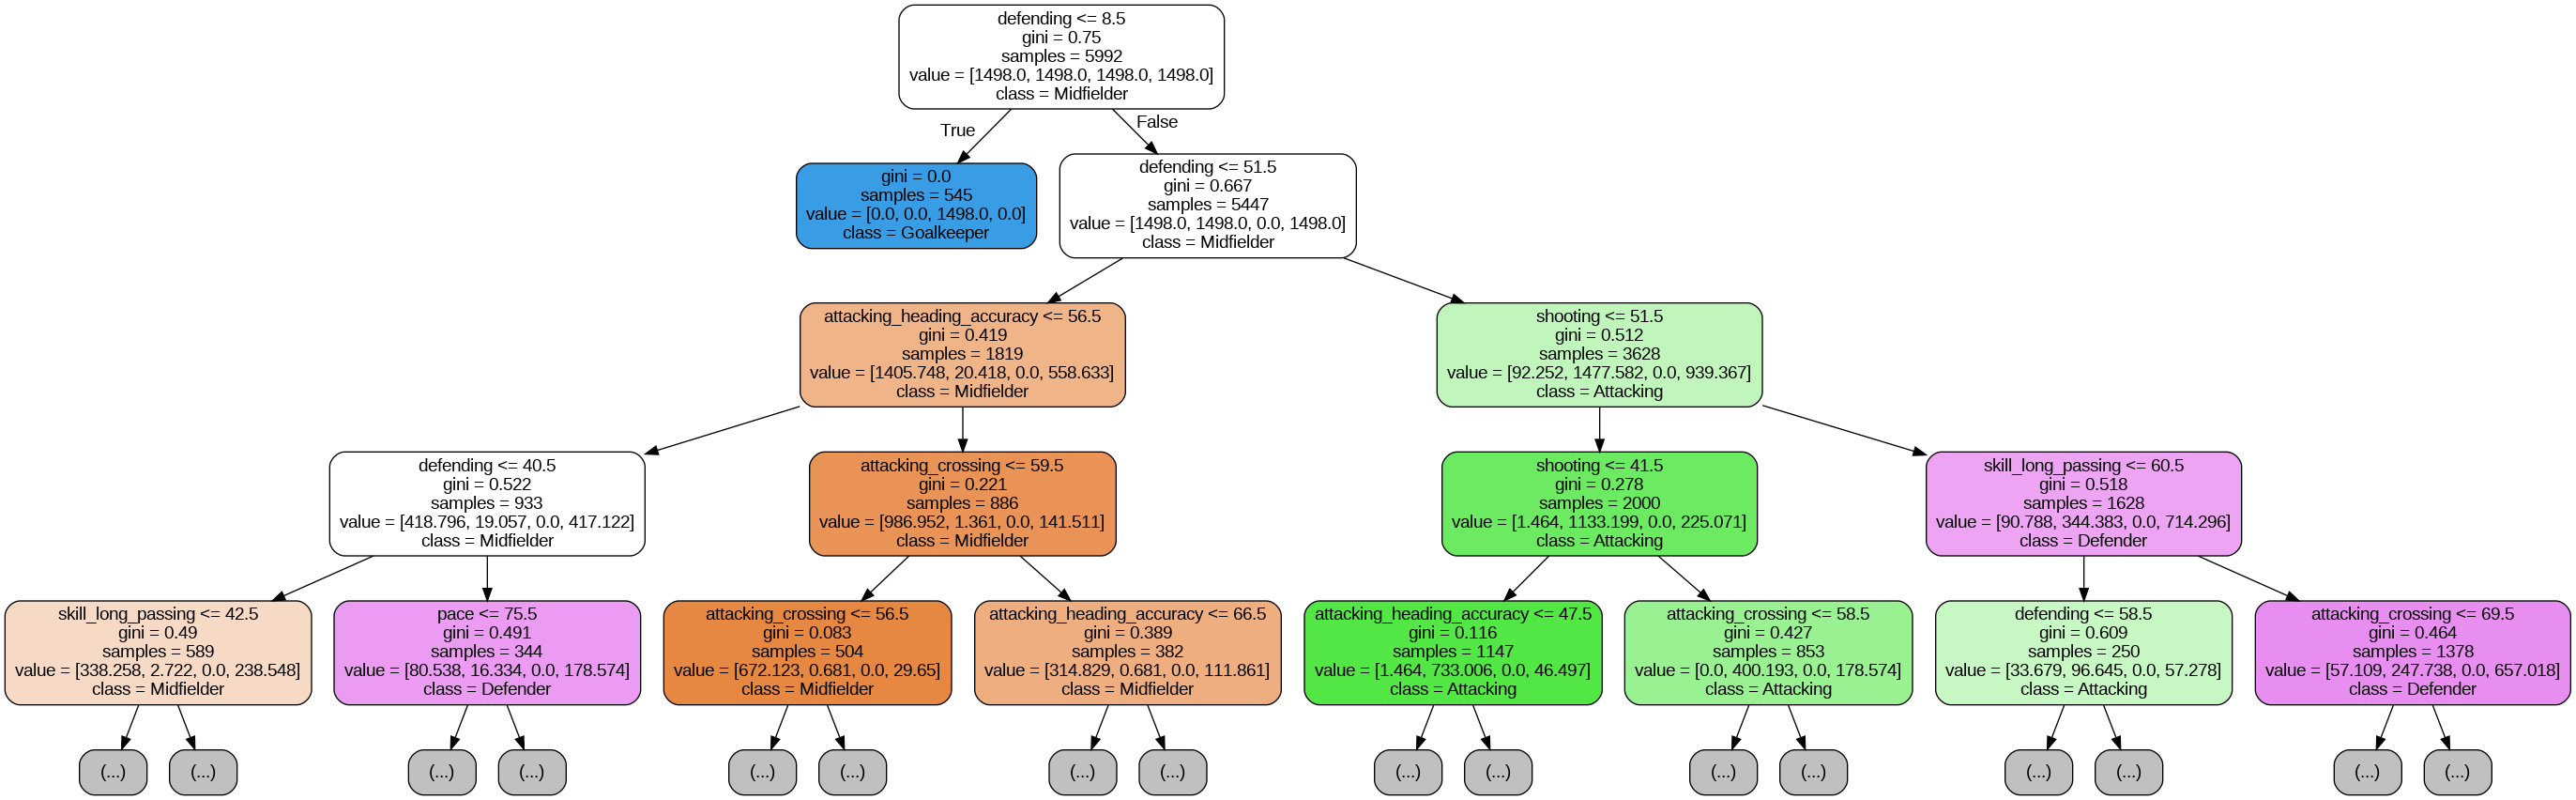

In [ ]:
# Exportar el modelo a archivo .dot y graficar
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              impurity = True,
                              feature_names = list(df_def.drop(['position'], axis=1)),
                              class_names = ['Midfielder', 'Attacking', 'Goalkeeper', 'Defender'],
                              rounded = True,
                              filled= True,
                              max_depth=4) #Dada la extensión del árbol, se reduce a 4 su profundidad máxima, para poder visualizarlo

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [ ]:
#Importancia de las variables
pd.DataFrame(decision_tree.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)

,0
defending,0.708774
shooting,0.124394
attacking_heading_accuracy,0.070622
attacking_crossing,0.036860
skill_long_passing,0.032219
pace,0.010636
power_stamina,0.009902
passing,0.005075
physic,0.001518


La característica del nodo raíz es defending, y resulta muy importante, ya que es capaz de dividir adecuadamente los datos, separando los que corresponden a Goalkeeper, lo cual tiene sentido puesto que todos los porteros tienen valor igual a 0 para esta variable, y el criterio de decisión es tener un valor <= 8.5.  

El nodo hijo de la izquierda es un nodo hoja, y es el que clasifica en su totalidad a la posición Goalkeeper.

En su nodo hijo de la derecha, el criterio defending <= 51.5 divide significativamente los datos en mediocampista (midfielder) y atacante (attacking).

##Matriz de confusión

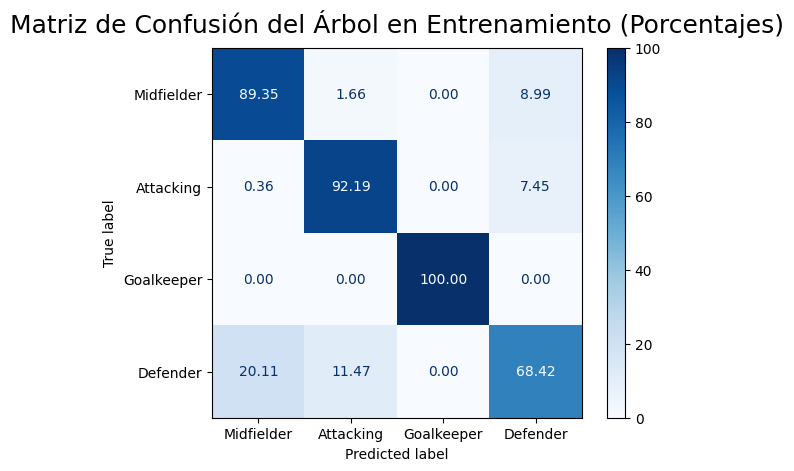

In [ ]:
cm = confusion_matrix(y_train, decision_tree.predict(X_train))

# Normalizar la matriz por filas para obtener porcentajes
cm_percent = cm.astype(np.float64) / cm.sum(axis=1, keepdims=True) * 100  # Multiplicamos por 100 para convertir a %

# Mostrar la matriz de confusión con valores en porcentaje
disp = ConfusionMatrixDisplay(cm_percent, display_labels=['Midfielder', 'Attacking', 'Goalkeeper', 'Defender'])
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # ".2f" para mostrar dos decimales

plt.title('Matriz de Confusión del Árbol en Entrenamiento (Porcentajes)', y=1.02, size=18)
plt.show()

- El modelo tiene un muy buen desempeño, con clasificaciones acertadas en la mayoría de las categorías.
- La mayor confusión ocurre entre Defender y otras posiciones.
- Goalkeeper es la clase más fácil de identificar (100% de precisión).

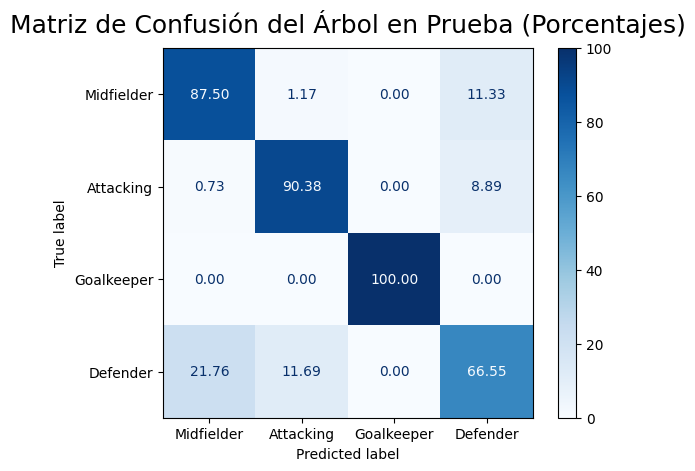

In [ ]:
cm_test = confusion_matrix(y_test, decision_tree.predict(X_test))

# Normalizar la matriz por filas para obtener porcentajes
cm_test_percent = cm_test.astype(np.float64) / cm_test.sum(axis=1, keepdims=True) * 100  # Convertir a %

# Mostrar la matriz de confusión con valores en porcentaje
disp_test = ConfusionMatrixDisplay(cm_test_percent, display_labels=['Midfielder', 'Attacking', 'Goalkeeper', 'Defender'])
disp_test.plot(cmap=plt.cm.Blues, values_format=".2f")  # ".2f" para dos decimales

plt.title('Matriz de Confusión del Árbol en Prueba (Porcentajes)', y=1.02, size=18)
plt.show()

- El modelo mantiene un buen desempeño, pero su precisión bajó ligeramente en casi todas las clases.
- Defender sigue siendo la clase con mayor confusión, lo que sugiere que el árbol de decisión tiene dificultades para separar bien a los defensores de los mediocampistas y delanteros.
- Goalkeeper sigue siendo la mejor clase clasificada (100%), lo que sugiere que los atributos de los porteros son muy distintos de los demás.

##Métrica de exactitud

In [ ]:
y_pred_train = decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

Exactitud con datos de entrenamiento: 0.84


In [ ]:
y_pred_test = decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de prueba: {:.2f}".format(acc_test))

Exactitud con datos de prueba: 0.82


##Métricas de precisión, sensibilidad (recall) y F1-Score

###Entrenamiento

In [ ]:
decoded_y_train = y_train
decoded_predictions = decision_tree.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_train, decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1023
           1       0.88      0.92      0.90      2201
           2       1.00      1.00      1.00       545
           3       0.86      0.68      0.76      2223

    accuracy                           0.84      5992
   macro avg       0.85      0.87      0.86      5992
weighted avg       0.85      0.84      0.83      5992



- Goalkeeper (2) sigue teniendo una clasificación perfecta (Precisión y Recall de 1.00), lo que indica que sus características son muy distintivas en comparación con otras posiciones.
- Midfielder (0) tiene la menor precisión (0.67), lo que sugiere que muchos jugadores etiquetados como mediocampistas están siendo clasificados erróneamente en otra posición, probablemente como defensores.
- Defender (3) tiene el menor recall (0.68), lo que indica que muchos defensores reales están siendo mal clasificados en otra categoría (posiblemente como mediocampistas o atacantes).
- Midfielder (0) y Defender (3) tienen los valores más bajos para F1-score (0.76 cada uno), lo que sugiere que el modelo aún comete errores al diferenciar estas posiciones de otras.

###Prueba (validación)

In [ ]:
decoded_y_test = y_test
decoded_predictions = decision_tree.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test, decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       256
           1       0.88      0.90      0.89       551
           2       1.00      1.00      1.00       136
           3       0.83      0.67      0.74       556

    accuracy                           0.82      1499
   macro avg       0.84      0.86      0.84      1499
weighted avg       0.83      0.82      0.82      1499



- Midfielder (0) tiene una precisión de 0.64, lo que indica que el modelo aún tiene dificultades para identificar correctamente a los mediocampistas y genera falsos positivos en esta categoría.
- Defender (3) tiene el menor recall (0.67), lo que significa que muchos defensores reales están siendo mal clasificados en otra categoría (posiblemente como mediocampistas o atacantes).
- Goalkeeper (2) sigue siendo perfectamente clasificado (1.00 en precisión y recall), lo que refuerza que esta posición tiene características muy distintas en comparación con las demás.
- Midfielder (0) y Defender (3) tienen los valores más bajos de F1-score (0.74 cada uno), lo que indica que el modelo sigue teniendo dificultades para diferenciarlos correctamente.
- Attacking (1) mantiene un buen rendimiento con un F1-score de 0.89, lo que muestra que el modelo clasifica bien esta categoría.

#Clasificación Bayesiana

###Métrica exactitud

In [ ]:
#Entrenar el clasificador
gnb = GaussianNB()
gnb.fit(
    X_train,
    y_train
)
y_pred = gnb.predict(X_test)

print('Exactitud con datos de entrenamiento: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Exactitud con datos de prueba: {:.2f}'.format(gnb.score(X_test, y_test)))

Exactitud con datos de entrenamiento: 0.76
Exactitud con datos de prueba: 0.75


##Matriz de confusión

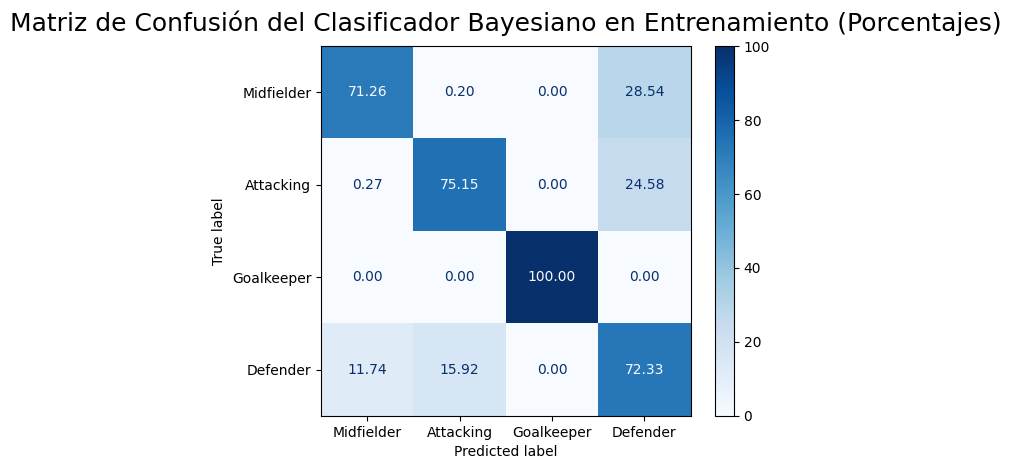

In [ ]:
cm_gnb = confusion_matrix(y_train, gnb.predict(X_train))

# Normalizar la matriz por filas para obtener porcentajes
cm_gnb_percent = cm_gnb.astype(np.float64) / cm_gnb.sum(axis=1, keepdims=True) * 100  # Convertir a %

# Mostrar la matriz de confusión con valores en porcentaje
disp_gnb = ConfusionMatrixDisplay(cm_gnb_percent, display_labels=['Midfielder', 'Attacking', 'Goalkeeper', 'Defender'])
disp_gnb.plot(cmap=plt.cm.Blues, values_format=".2f")

plt.title('Matriz de Confusión del Clasificador Bayesiano en Entrenamiento (Porcentajes)', y=1.02, size=18)
plt.show()

- La clasificación en entrenamiento tiene valores altos en la diagonal principal, lo que indica un buen rendimiento.
- Algunas clases tienen más confusión que otras, especialmente Midfielder y Attacking con Defender.
- El portero (Goalkeeper) es clasificado correctamente el 100% de las veces, sin errores.

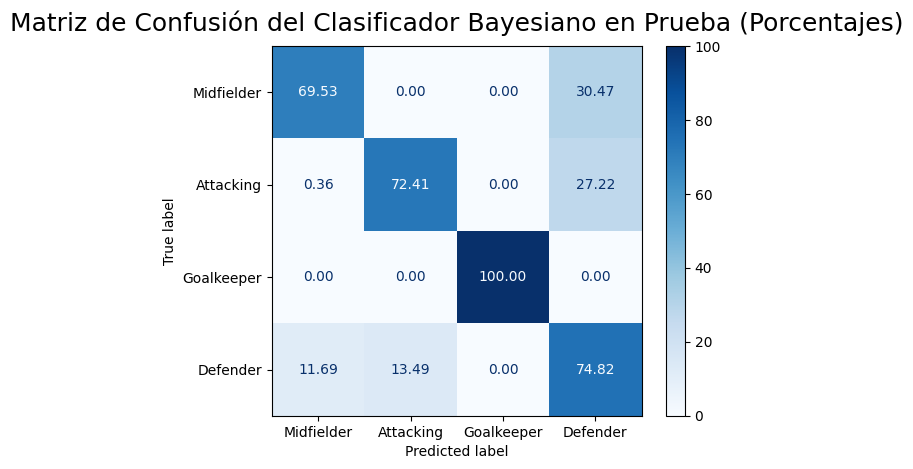

In [ ]:
cm_gnb_test = confusion_matrix(y_test, gnb.predict(X_test))

# Normalizar la matriz por filas para obtener porcentajes
cm_gnb_test_percent = cm_gnb_test.astype(np.float64) / cm_gnb_test.sum(axis=1, keepdims=True) * 100  # Convertir a %

# Mostrar la matriz de confusión con valores en porcentaje
disp_gnb_test = ConfusionMatrixDisplay(cm_gnb_test_percent, display_labels=['Midfielder', 'Attacking', 'Goalkeeper', 'Defender'])
disp_gnb_test.plot(cmap=plt.cm.Blues, values_format=".2f")

plt.title('Matriz de Confusión del Clasificador Bayesiano en Prueba (Porcentajes)', y=1.02, size=18)
plt.show()

- Midfielder tiene una precisión del 69.53%, lo que indica que el modelo sigue cometiendo errores al clasificar esta posición, con un 30.47% de jugadores mal clasificados como defensores.
- Defender muestra cierta confusión, con un 11.69% de sus jugadores mal clasificados como mediocampistas y un 13.49% como atacantes.
- Goalkeeper sigue siendo identificado con 100% de precisión, lo que indica que sus características son muy distintivas y fáciles de reconocer para el modelo.
- Attacking tiene una precisión del 72.41%, pero presenta un 27.22% de jugadores mal clasificados como defensores, lo que muestra una ligera confusión entre estas posiciones.

##Métricas de precisión, sensibilidad (recall) y F1-Score

###Entrenamiento

In [ ]:
decoded_y_train = y_train
decoded_predictions = gnb.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_train, decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1023
           1       0.82      0.75      0.79      2201
           2       1.00      1.00      1.00       545
           3       0.66      0.72      0.69      2223

    accuracy                           0.76      5992
   macro avg       0.80      0.80      0.80      5992
weighted avg       0.76      0.76      0.76      5992



- Goalkeeper (2) sigue teniendo la mejor precisión y recall (1.00), indicando que el modelo clasifica esta categoría perfectamente.
- Defender (3) tiene la menor precisión (0.66), lo que indica que muchas instancias clasificadas como defensores en realidad pertenecen a otras clases.
- Attacking (1) tiene un recall de 0.75, lo que indica que el modelo no está reconociendo algunas instancias de esta clase (hay falsos negativos).
- Defender (3) sigue teniendo el F1-score más bajo (0.69), lo que sugiere que es la categoría con más errores de clasificación.

###Prueba (validación)


In [ ]:
decoded_y_test = y_test
decoded_predictions = gnb.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test, decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       256
           1       0.84      0.72      0.78       551
           2       1.00      1.00      1.00       136
           3       0.65      0.75      0.69       556

    accuracy                           0.75      1499
   macro avg       0.80      0.79      0.80      1499
weighted avg       0.76      0.75      0.76      1499



- Defender (3) tiene una precisión de 0.65, mostrando una ligera disminución, lo que indica que sigue siendo la categoría con mayor confusión.
- Midfielder (0) tiene un recall de 0.70, lo que sugiere que el modelo aún tiene dificultades para identificar correctamente a los mediocampistas en la prueba.
- Attacking (1) tiene un F1-score de 0.78, lo que indica un rendimiento estable en la clasificación de atacantes.
- Goalkeeper (2) sigue siendo clasificado perfectamente con 1.00 en precisión y recall, lo que confirma que el modelo distingue bien a los arqueros.

#Análisis de resultados y conclusiones

###**Comparativa entre ambas técnicas**
1. Precisión general: El Árbol de Decisión obtuvo una precisión de 0.84 en entrenamiento y 0.82 en prueba, mientras que el Clasificador Bayesiano alcanzó 0.76 en entrenamiento y 0.75 en prueba. Esto confirma que el Árbol de Decisión tiene un mejor rendimiento general.
2. Goalkeeper (2): Ambos modelos clasificaron perfectamente a los arqueros, con 1.00 en precisión y recall, lo que indica que esta posición es la más fácil de identificar.
3. Midfielder (0) y Defender (3): Estas fueron las categorías con más errores en ambos modelos, pero el Árbol de Decisión logró mejores valores de precisión, recall y F1-score, reduciendo la confusión entre mediocampistas y defensores en comparación con el modelo bayesiano.
4. Confusión entre clases: La matriz de confusión mostró que el modelo bayesiano tiene más errores clasificando mediocampistas como defensores y atacantes, mientras que el Árbol de Decisión redujo significativamente estos errores.

###**Conclusión**
El Árbol de Decisión es el mejor modelo para la clasificación de la posición de jugadores de fútbol en FIFA. No solo presenta una mayor precisión en entrenamiento y prueba, sino que también tiene un mejor balance entre precisión y recall en las clases más difíciles de diferenciar.

Si el objetivo es obtener una clasificación más precisa y confiable, el Árbol de Decisión es la mejor opción frente al Clasificador Bayesiano.